In [1]:
import scipy.io
import pandas as pd
import numpy as np


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Sınıflandırma algoritmaları
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
#iki tane gloval liste oluştur
accuracies = []
classifier_names = []

def test_algoritmasi(X, Y):
    # Veriyi eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    #accuraces ve classifier_names listeleri global değişkenler olduğu için fonksiyon içinde tanımlamamız gerekiyor. Bu listeleri boşaltıyoruz.
    global accuracies
    global classifier_names
    accuracies.clear()
    classifier_names.clear()

    classifiers = [
        (LogisticRegression(), "Logistic Regression"),
        (RidgeClassifier(), "Ridge Classifier"),
        (SVC(), "SVM"),
        (NuSVC(), "NuSVC"),
        (LinearSVC(), "LinearSVC"),
        (KNeighborsClassifier(), "K-Nearest Neighbors"),
        (RadiusNeighborsClassifier(), "Radius Neighbors Classifier"),
        (DecisionTreeClassifier(), "Decision Tree"),
        (ExtraTreeClassifier(), "Extra Tree Classifier"),
        (RandomForestClassifier(), "Random Forest"),
        (AdaBoostClassifier(), "AdaBoost"),
        (GradientBoostingClassifier(), "Gradient Boosting"),
        (BaggingClassifier(), "Bagging Classifier"),
        (GaussianNB(), "Gaussian Naive Bayes"),
        (MultinomialNB(), "Multinomial Naive Bayes"),
        (BernoulliNB(), "Bernoulli Naive Bayes"),
        (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis"),
        (QuadraticDiscriminantAnalysis(), "Quadratic Discriminant Analysis"),
        (MLPClassifier(), "Multi-layer Perceptron")
    ]

    # Her bir sınıflandırıcı için eğitim ve test işlemlerini yapın
    results = {}
    
    for clf, name in classifiers:
        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name] = accuracy
            print(f"{name} accuracy: {accuracy:.2f}")
            accuracies.append(accuracy)
            classifier_names.append(name)
        except:
            print(f"{name} başarısız oldu.")

    # En iyi performans gösteren algoritmayı bulun
    best_classifier = max(results, key=results.get)
    print(f"En iyi performans gösteren algoritma: {best_classifier} with an accuracy of {results[best_classifier]:.2f}")
    


## Veri İçe Aktarımı ve Hazırlık
Verileri içe aktarıp eğitim için gerekli X ve Y matrislerini oluşturan kodlar.

In [3]:
# .mat dosyasını yükleme
sag_veri1 = scipy.io.loadmat('data/sag_ensar1.mat')
# ikinci sag veriyi include et
sag_veri2 = scipy.io.loadmat('data/sag_ensar2.mat')
sag_veri3 = scipy.io.loadmat('data/sag_omer1.mat')
sag_veri4 = scipy.io.loadmat('data/sag_omer2.mat')

sol_veri1 = scipy.io.loadmat('data/sol_ensar1.mat')
sol_veri2 = scipy.io.loadmat('data/sol_ensar2.mat')
sol_veri3 = scipy.io.loadmat('data/sol_omer1.mat')
sol_veri4 = scipy.io.loadmat('data/sol_omer2.mat')

# sag verileri birleştirme
sag_veri = np.concatenate((sag_veri1['eeg_data'], sag_veri2['eeg_data'], sag_veri3['eeg_data'], sag_veri4['eeg_data']), axis=0)
sol_veri = np.concatenate((sol_veri1['eeg_data'], sol_veri2['eeg_data'], sol_veri3['eeg_data'], sol_veri4['eeg_data']), axis=0)

# pandas dataframe oluşturma
sag_veri = pd.DataFrame(sag_veri)
sol_veri = pd.DataFrame(sol_veri)

# kanal seçimi (SADECE TEK SUTUNU SEÇMEK İÇİN)

# kanal = 0

# sag_veri  = sag_veri.iloc[:,kanal]
# sol_veri  = sol_veri.iloc[:,kanal]


 Kanal indeksi: 0 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.61
Ridge Classifier accuracy: 0.62
SVM accuracy: 0.59
NuSVC accuracy: 0.59


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.50
K-Nearest Neighbors accuracy: 0.58
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.70
Extra Tree Classifier accuracy: 0.68
Random Forest accuracy: 0.76
AdaBoost accuracy: 0.73
Gradient Boosting accuracy: 0.76
Bagging Classifier accuracy: 0.77
Gaussian Naive Bayes accuracy: 0.61
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.62
Linear Discriminant Analysis accuracy: 0.68
Quadratic Discriminant Analysis accuracy: 0.65


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.55
En iyi performans gösteren algoritma: Bagging Classifier with an accuracy of 0.77


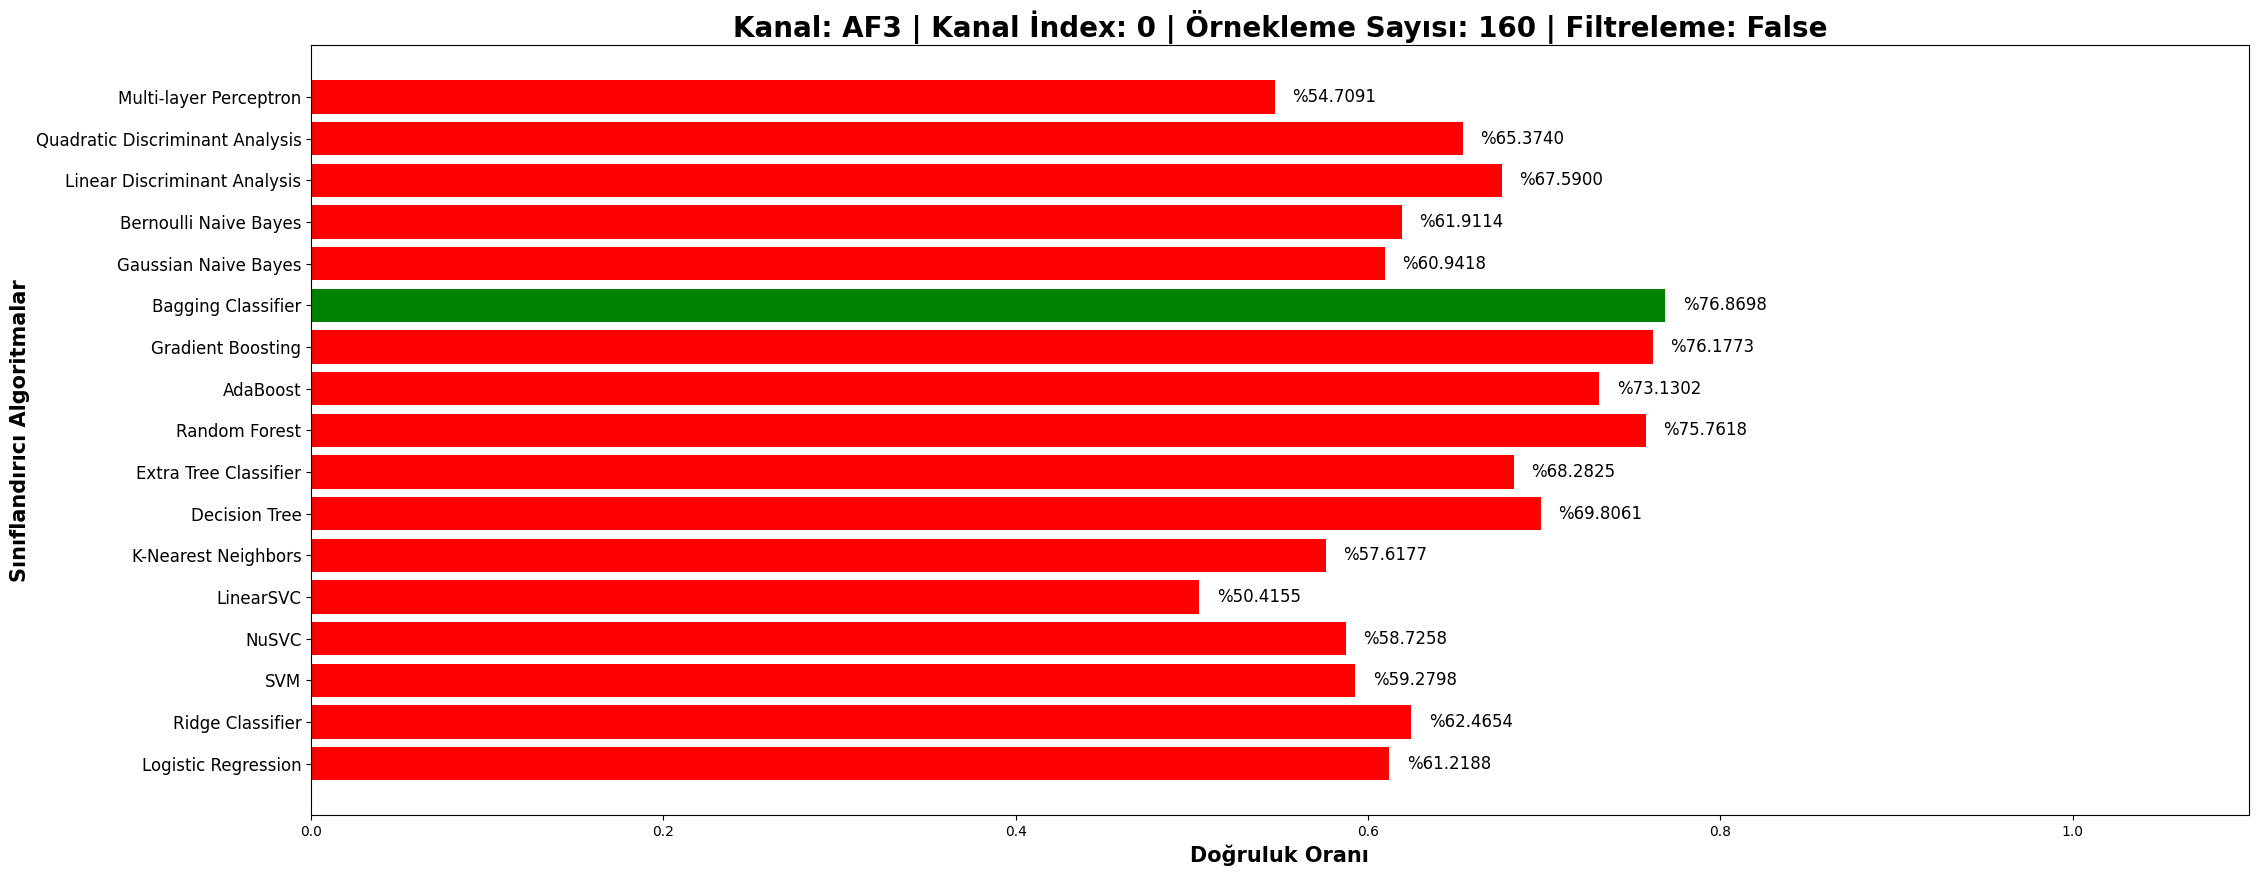


 Kanal indeksi: 1 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.63
Ridge Classifier accuracy: 0.63
SVM accuracy: 0.60
NuSVC accuracy: 0.59


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.57
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.81
Extra Tree Classifier accuracy: 0.60
Random Forest accuracy: 0.82
AdaBoost accuracy: 0.84
Gradient Boosting accuracy: 0.88
Bagging Classifier accuracy: 0.84
Gaussian Naive Bayes accuracy: 0.61
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.54
Linear Discriminant Analysis accuracy: 0.63
Quadratic Discriminant Analysis accuracy: 0.53


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.60
En iyi performans gösteren algoritma: Gradient Boosting with an accuracy of 0.88


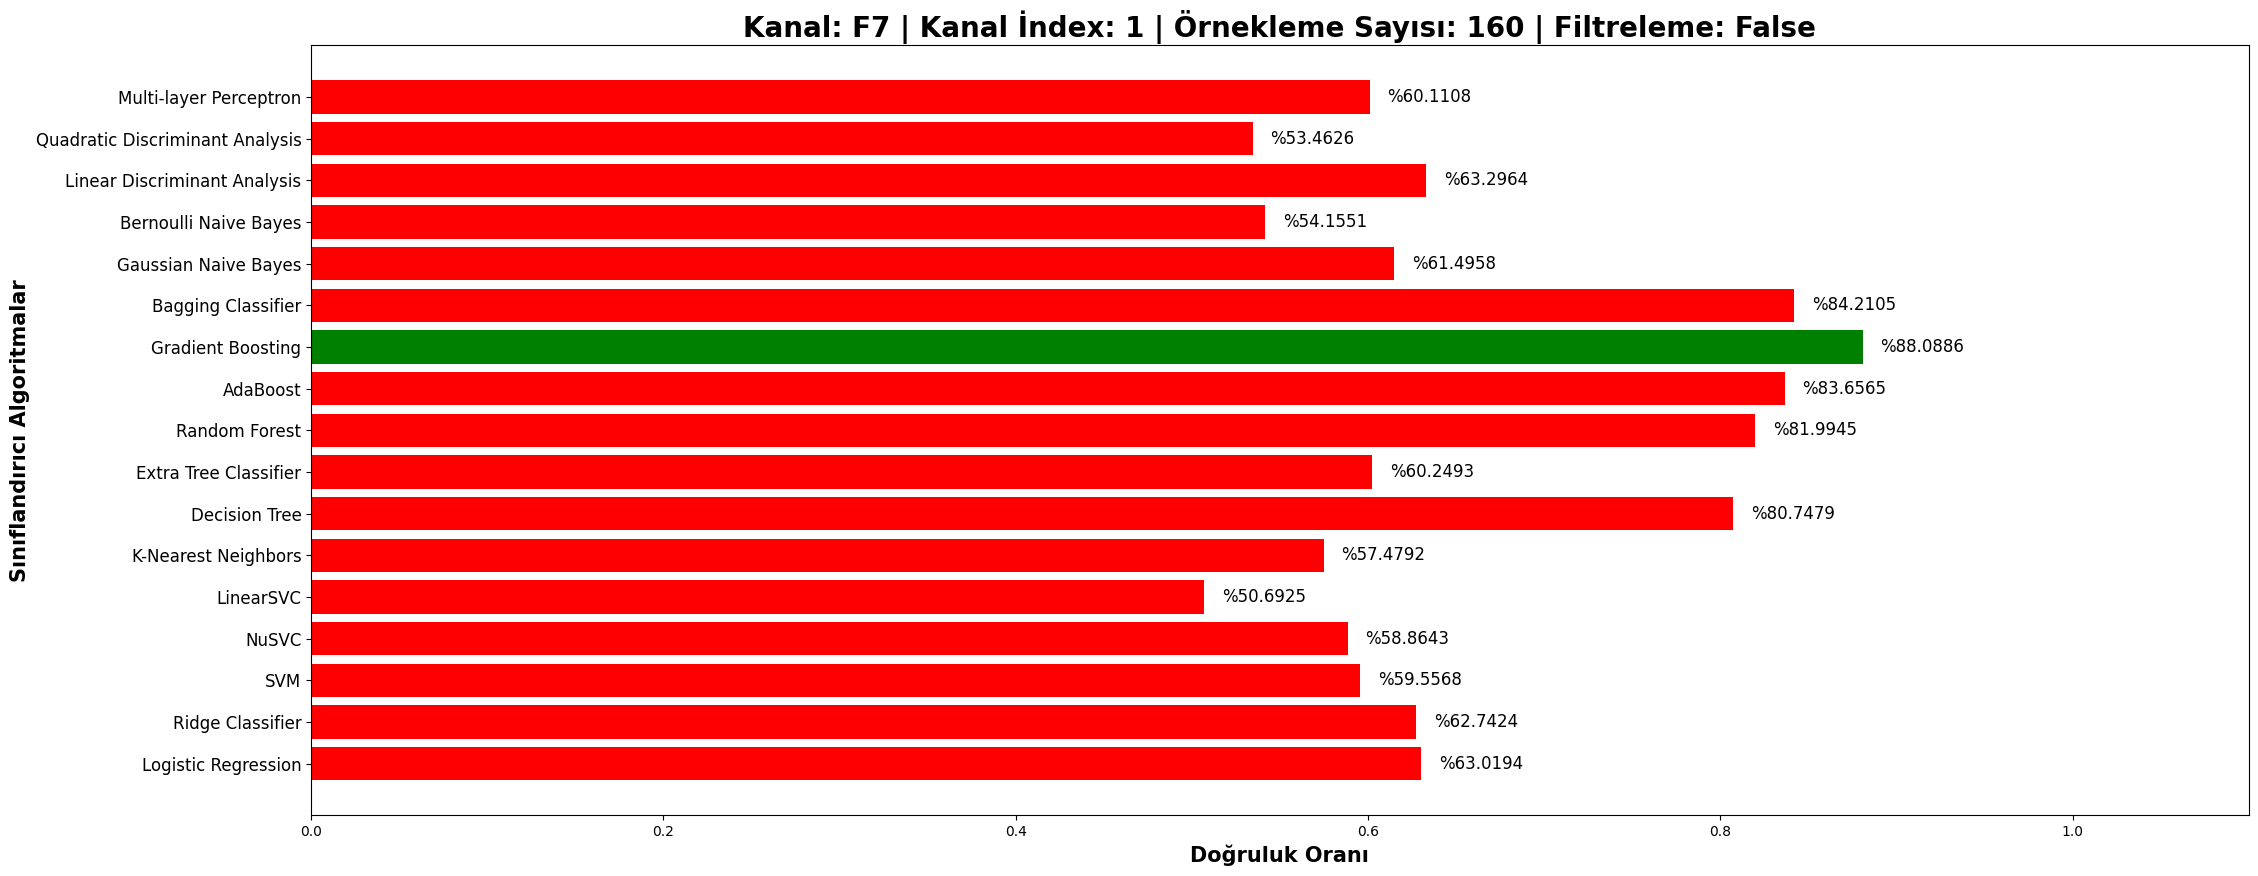


 Kanal indeksi: 2 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.52
Ridge Classifier accuracy: 0.54
SVM accuracy: 0.52
NuSVC accuracy: 0.47


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.51
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.68
Extra Tree Classifier accuracy: 0.58
Random Forest accuracy: 0.71
AdaBoost accuracy: 0.67
Gradient Boosting accuracy: 0.70
Bagging Classifier accuracy: 0.70
Gaussian Naive Bayes accuracy: 0.51
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.50
Linear Discriminant Analysis accuracy: 0.54
Quadratic Discriminant Analysis accuracy: 0.55


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.51
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.71


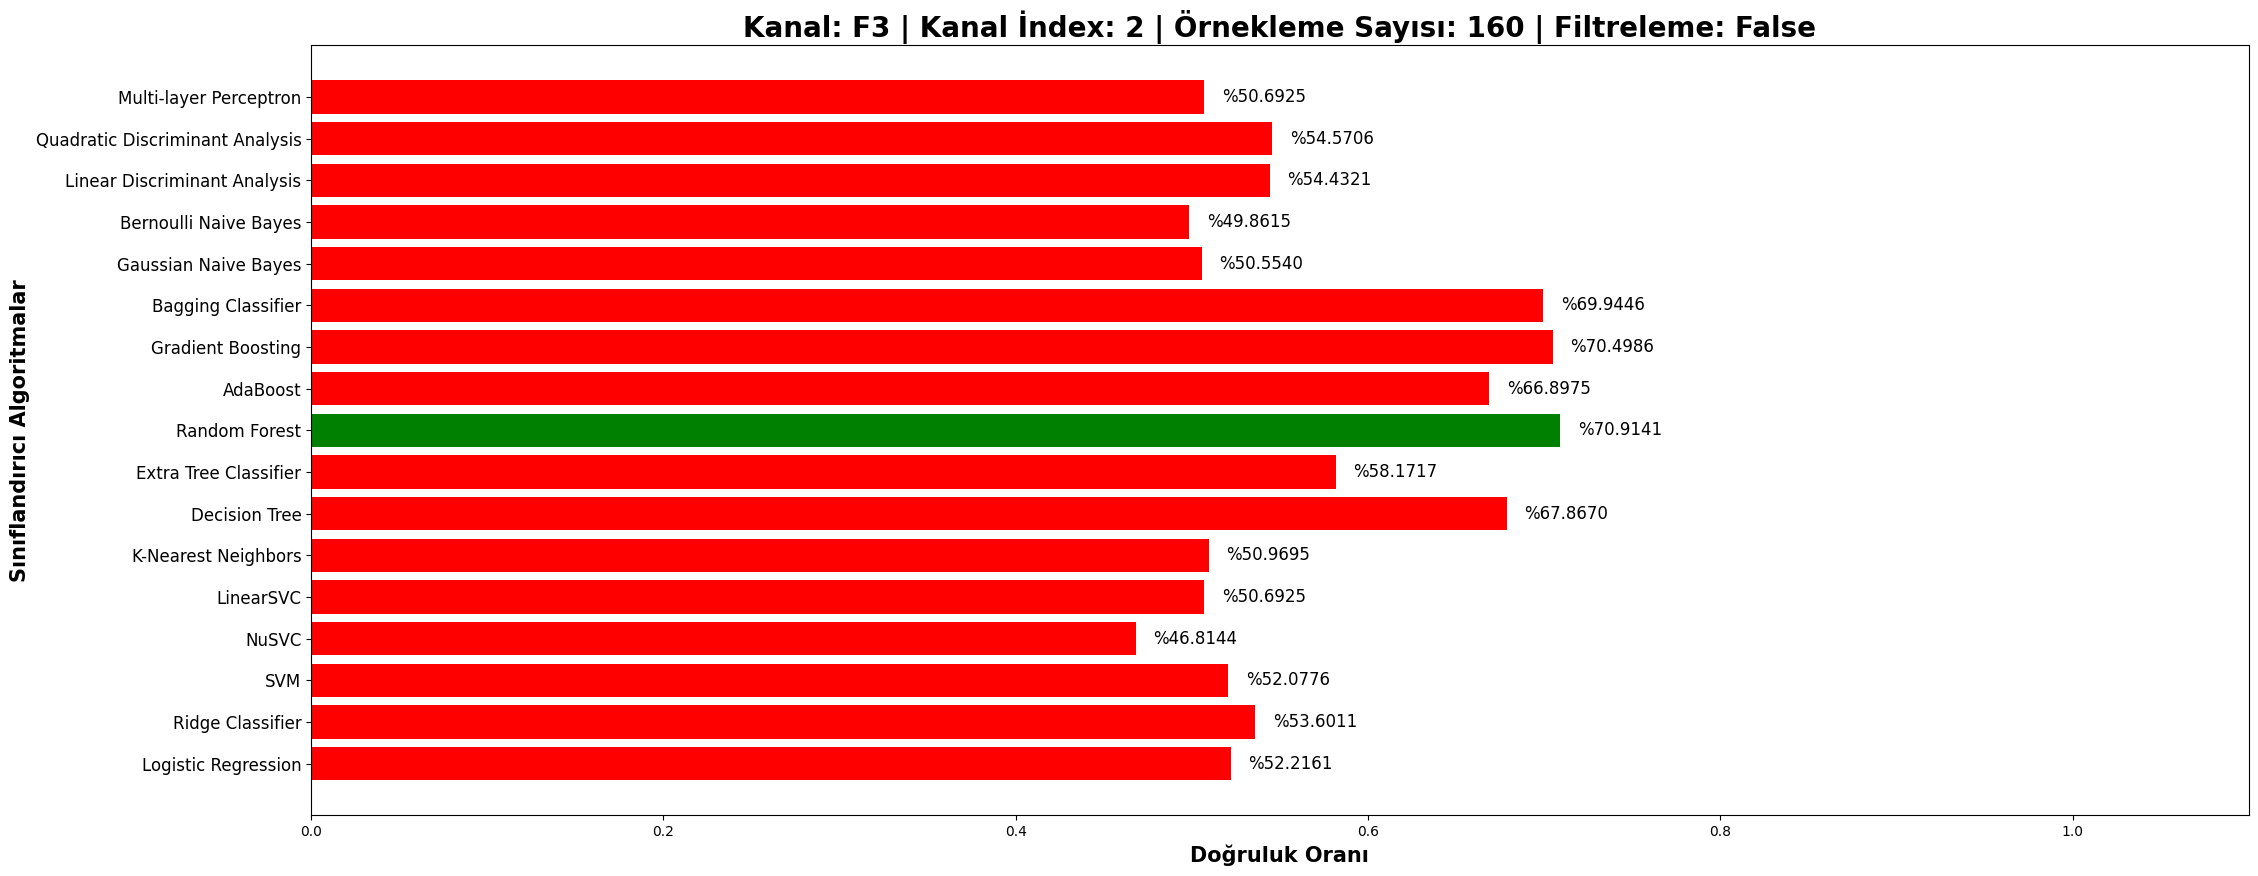


 Kanal indeksi: 3 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.53
Ridge Classifier accuracy: 0.52
SVM accuracy: 0.53
NuSVC accuracy: 0.53


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.52
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.70
Extra Tree Classifier accuracy: 0.65
Random Forest accuracy: 0.75
AdaBoost accuracy: 0.72
Gradient Boosting accuracy: 0.74
Bagging Classifier accuracy: 0.72
Gaussian Naive Bayes accuracy: 0.51
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.49
Linear Discriminant Analysis accuracy: 0.62
Quadratic Discriminant Analysis accuracy: 0.53


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.51
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.75


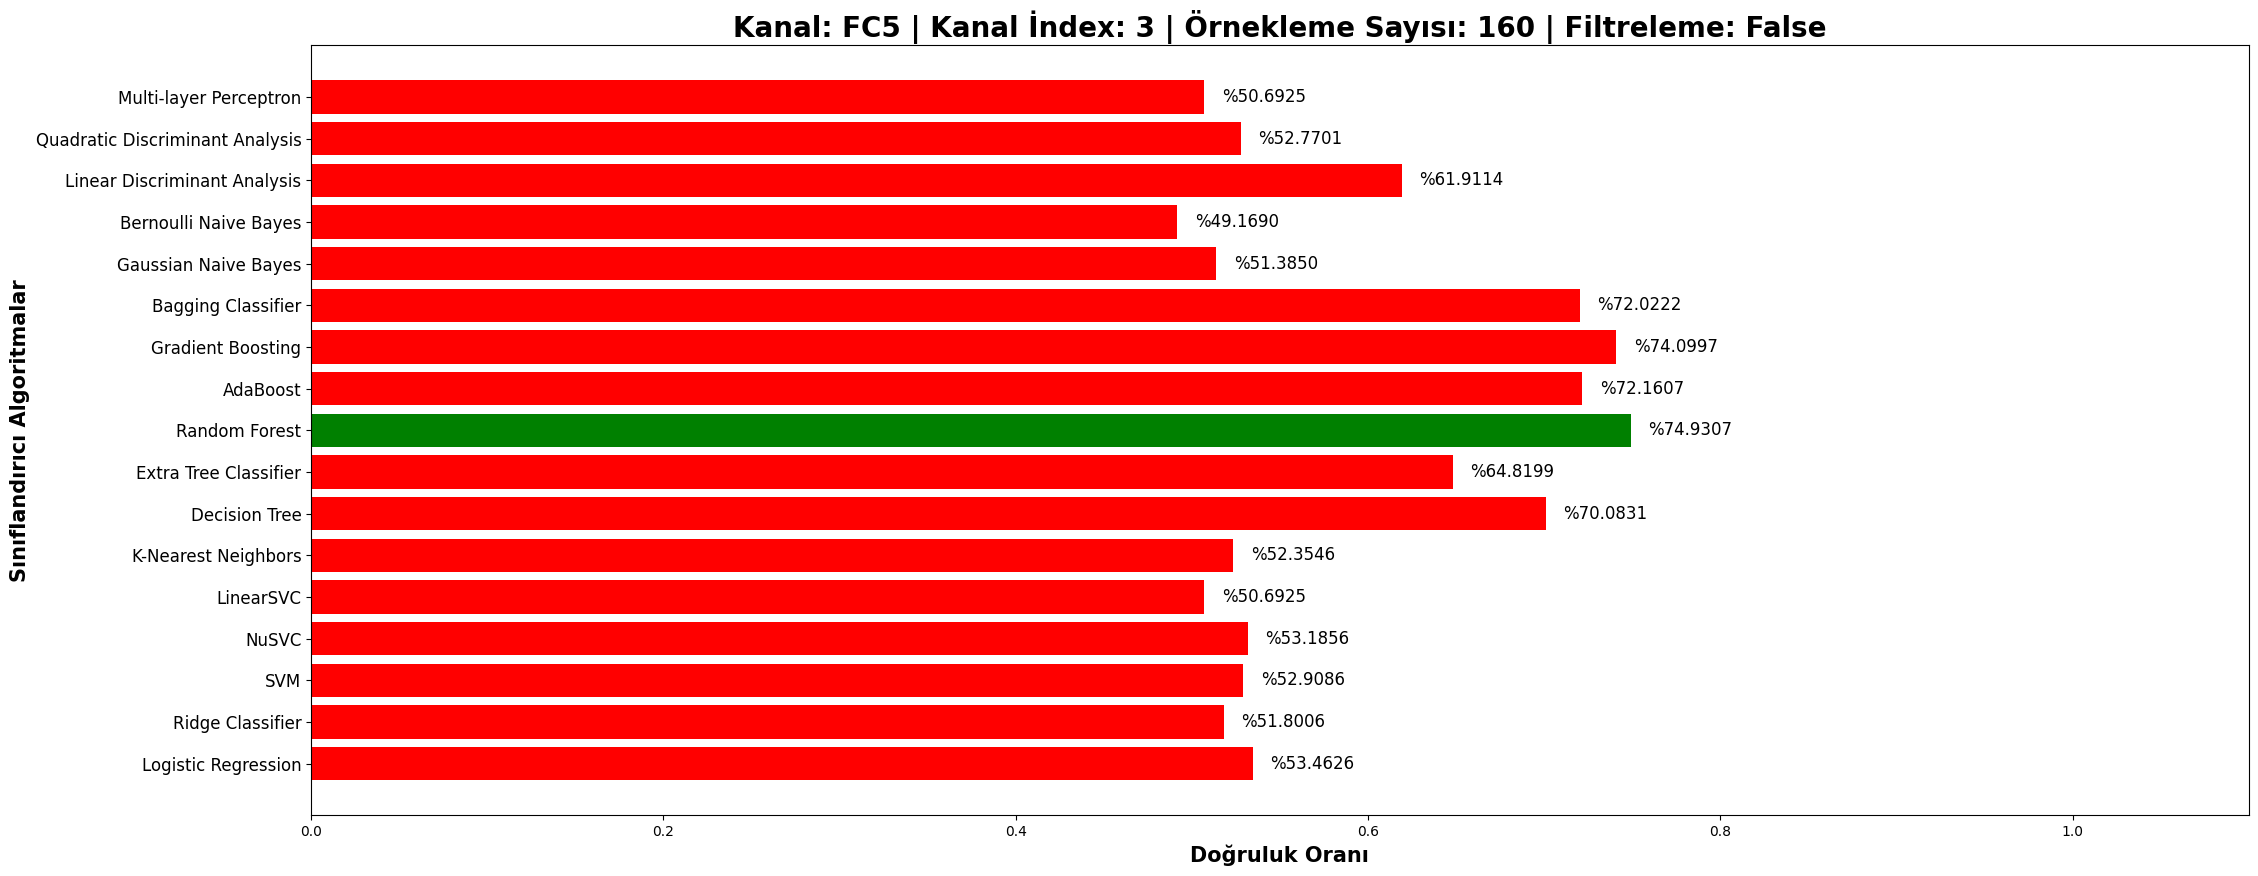


 Kanal indeksi: 4 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.58
Ridge Classifier accuracy: 0.58
SVM accuracy: 0.59
NuSVC accuracy: 0.46


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.59
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.77
Extra Tree Classifier accuracy: 0.66
Random Forest accuracy: 0.83
AdaBoost accuracy: 0.68
Gradient Boosting accuracy: 0.79
Bagging Classifier accuracy: 0.82
Gaussian Naive Bayes accuracy: 0.58
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.53
Linear Discriminant Analysis accuracy: 0.57
Quadratic Discriminant Analysis accuracy: 0.63


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.49
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.83


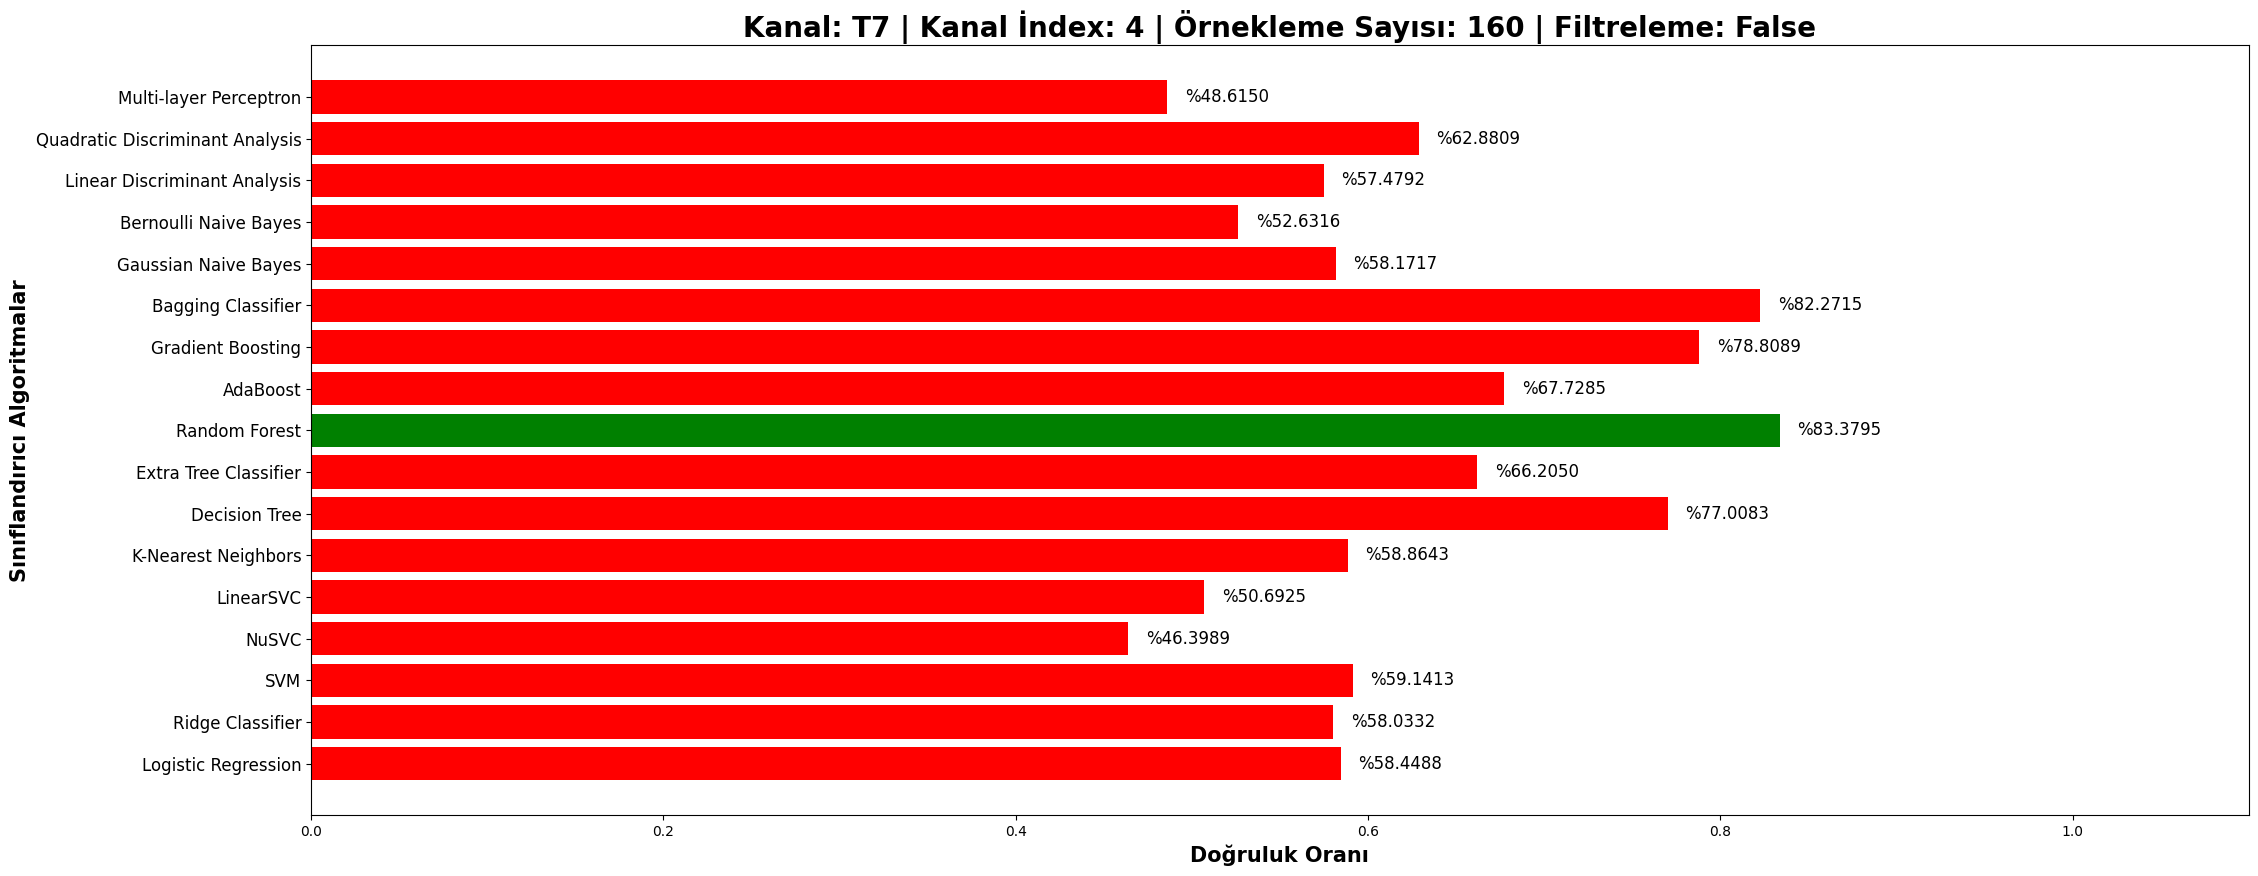


 Kanal indeksi: 5 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.49
Ridge Classifier accuracy: 0.52
SVM accuracy: 0.51
NuSVC accuracy: 0.50


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.49
K-Nearest Neighbors accuracy: 0.54
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.80
Extra Tree Classifier accuracy: 0.64
Random Forest accuracy: 0.80
AdaBoost accuracy: 0.76
Gradient Boosting accuracy: 0.83
Bagging Classifier accuracy: 0.81
Gaussian Naive Bayes accuracy: 0.51
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.52
Linear Discriminant Analysis accuracy: 0.57
Quadratic Discriminant Analysis accuracy: 0.57


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.47
En iyi performans gösteren algoritma: Gradient Boosting with an accuracy of 0.83


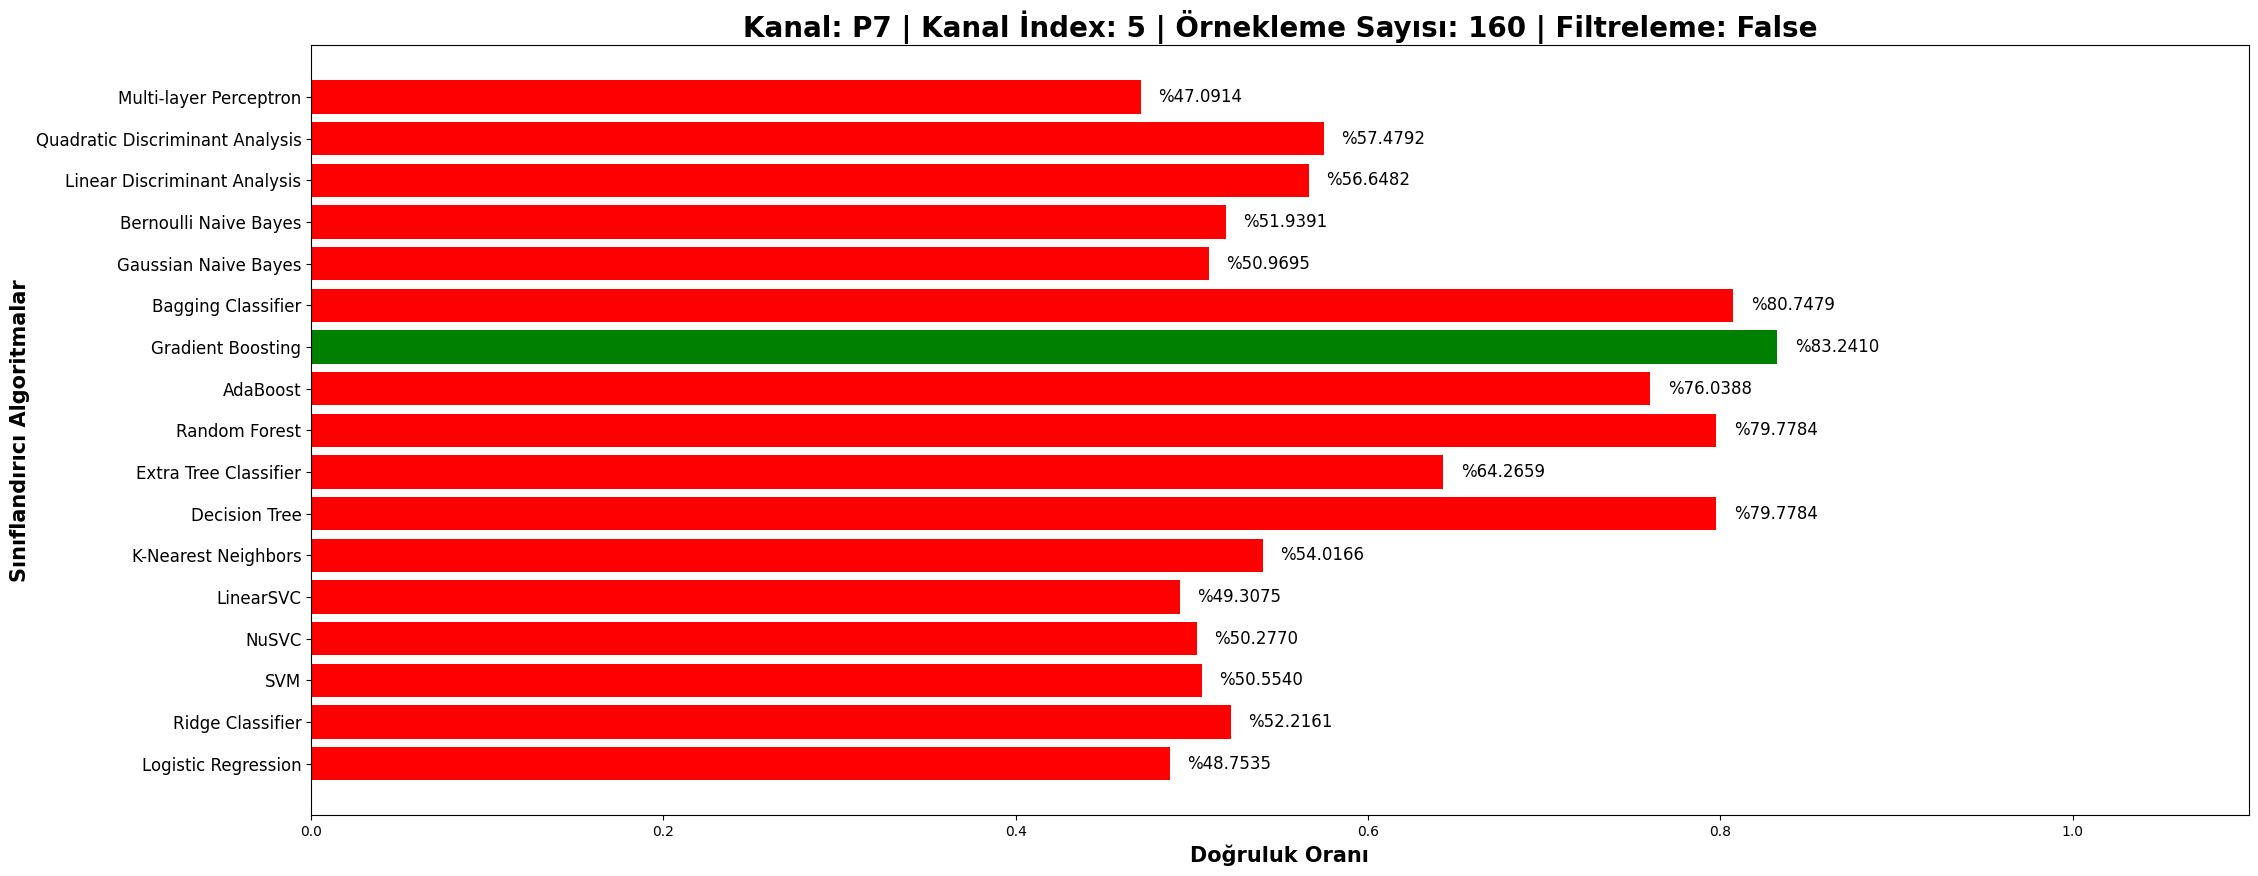


 Kanal indeksi: 6 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.69
Ridge Classifier accuracy: 0.67
SVM accuracy: 0.66
NuSVC accuracy: 0.86
LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.88
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.92
Extra Tree Classifier accuracy: 0.92


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Random Forest accuracy: 0.94
AdaBoost accuracy: 0.93
Gradient Boosting accuracy: 0.94
Bagging Classifier accuracy: 0.94
Gaussian Naive Bayes accuracy: 0.47
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.47
Linear Discriminant Analysis accuracy: 0.82
Quadratic Discriminant Analysis accuracy: 0.66


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.54
En iyi performans gösteren algoritma: Gradient Boosting with an accuracy of 0.94


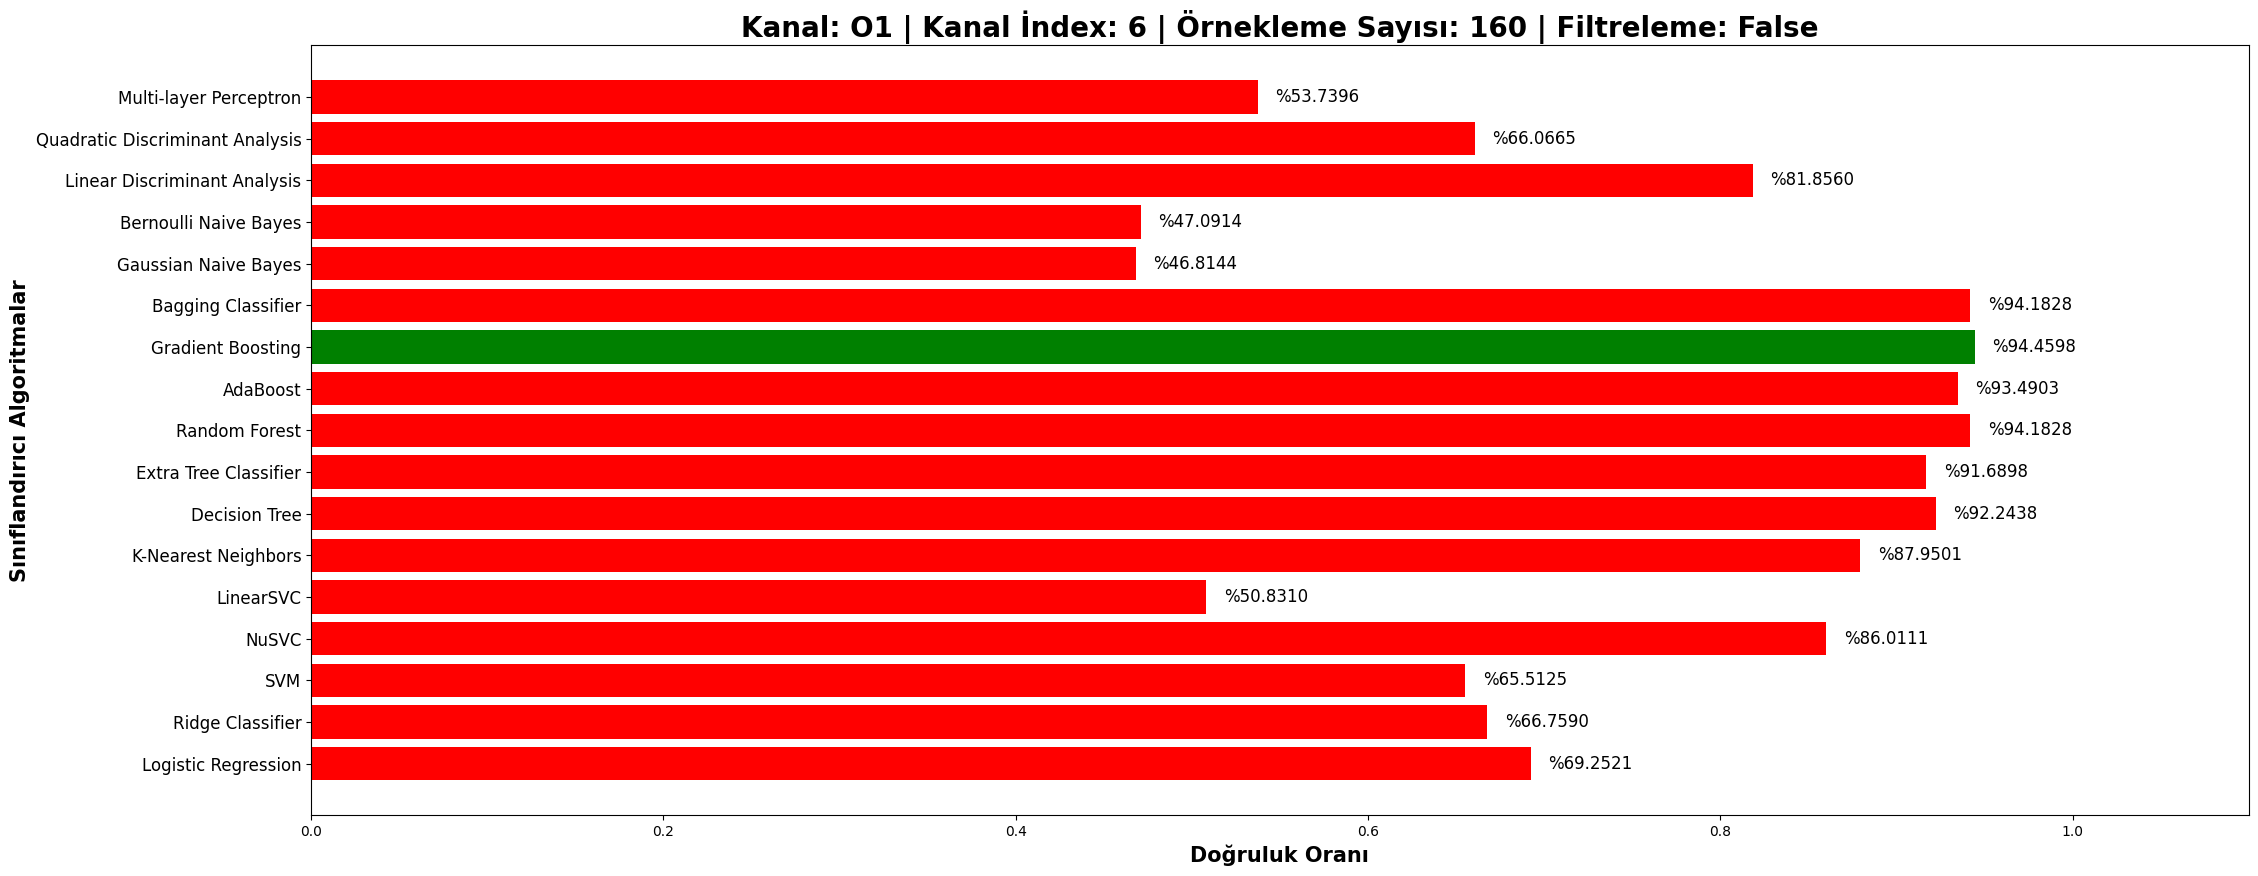


 Kanal indeksi: 7 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.70
Ridge Classifier accuracy: 0.74
SVM accuracy: 0.82
NuSVC accuracy: 0.82
LinearSVC accuracy: 0.49
K-Nearest Neighbors accuracy: 0.93
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.93
Extra Tree Classifier accuracy: 0.94


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Random Forest accuracy: 0.96
AdaBoost accuracy: 0.96
Gradient Boosting accuracy: 0.96
Bagging Classifier accuracy: 0.95
Gaussian Naive Bayes accuracy: 0.68
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.60
Linear Discriminant Analysis accuracy: 0.94
Quadratic Discriminant Analysis accuracy: 0.86


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.61
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.96


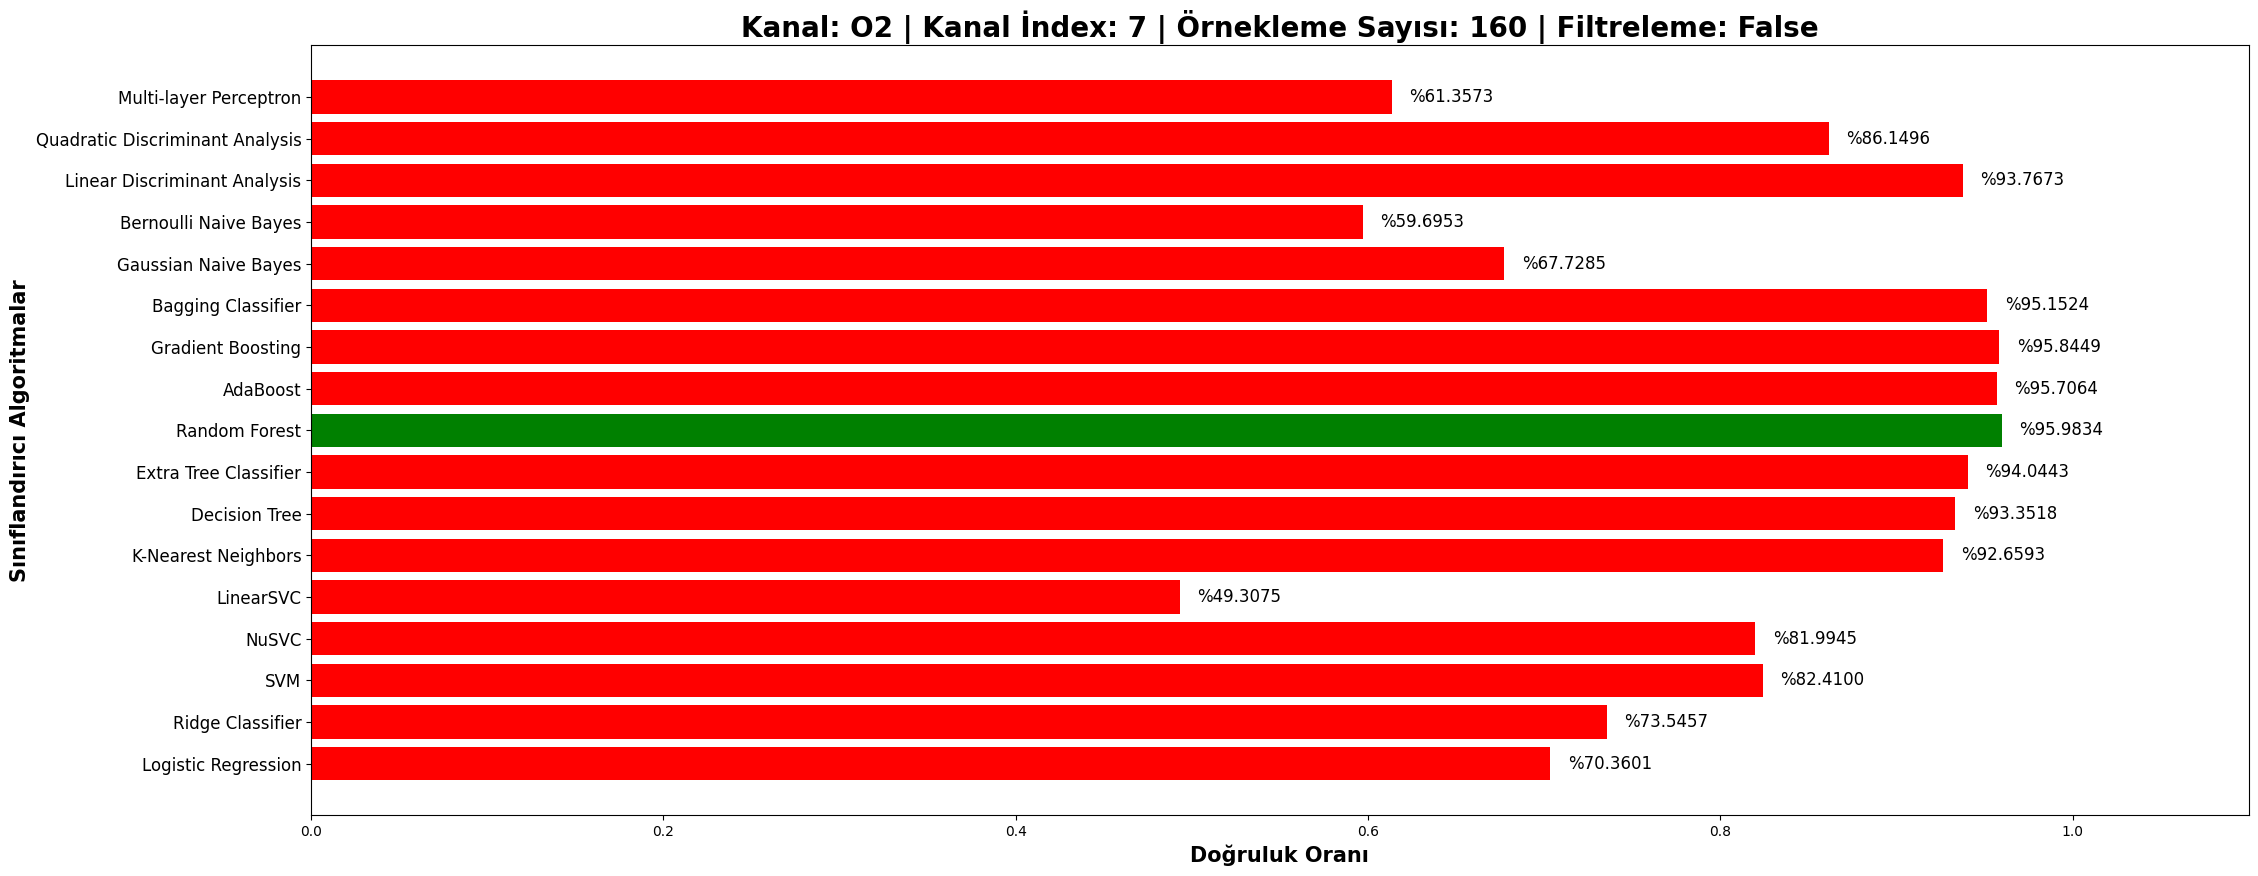


 Kanal indeksi: 8 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  [20]

 8 Kanal indeksi hatalı

 Kanal indeksi: 9 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.49
Ridge Classifier accuracy: 0.49
SVM accuracy: 0.49
NuSVC accuracy: 0.49
LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.57
Radius Neighbors Classifier başarısız oldu.
Decision Tree accuracy: 0.57
Extra Tree Classifier accuracy: 0.55


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Random Forest accuracy: 0.63
AdaBoost accuracy: 0.61
Gradient Boosting accuracy: 0.64
Bagging Classifier accuracy: 0.61
Gaussian Naive Bayes accuracy: 0.48
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.52
Linear Discriminant Analysis accuracy: 0.54
Quadratic Discriminant Analysis accuracy: 0.49


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.49
En iyi performans gösteren algoritma: Gradient Boosting with an accuracy of 0.64


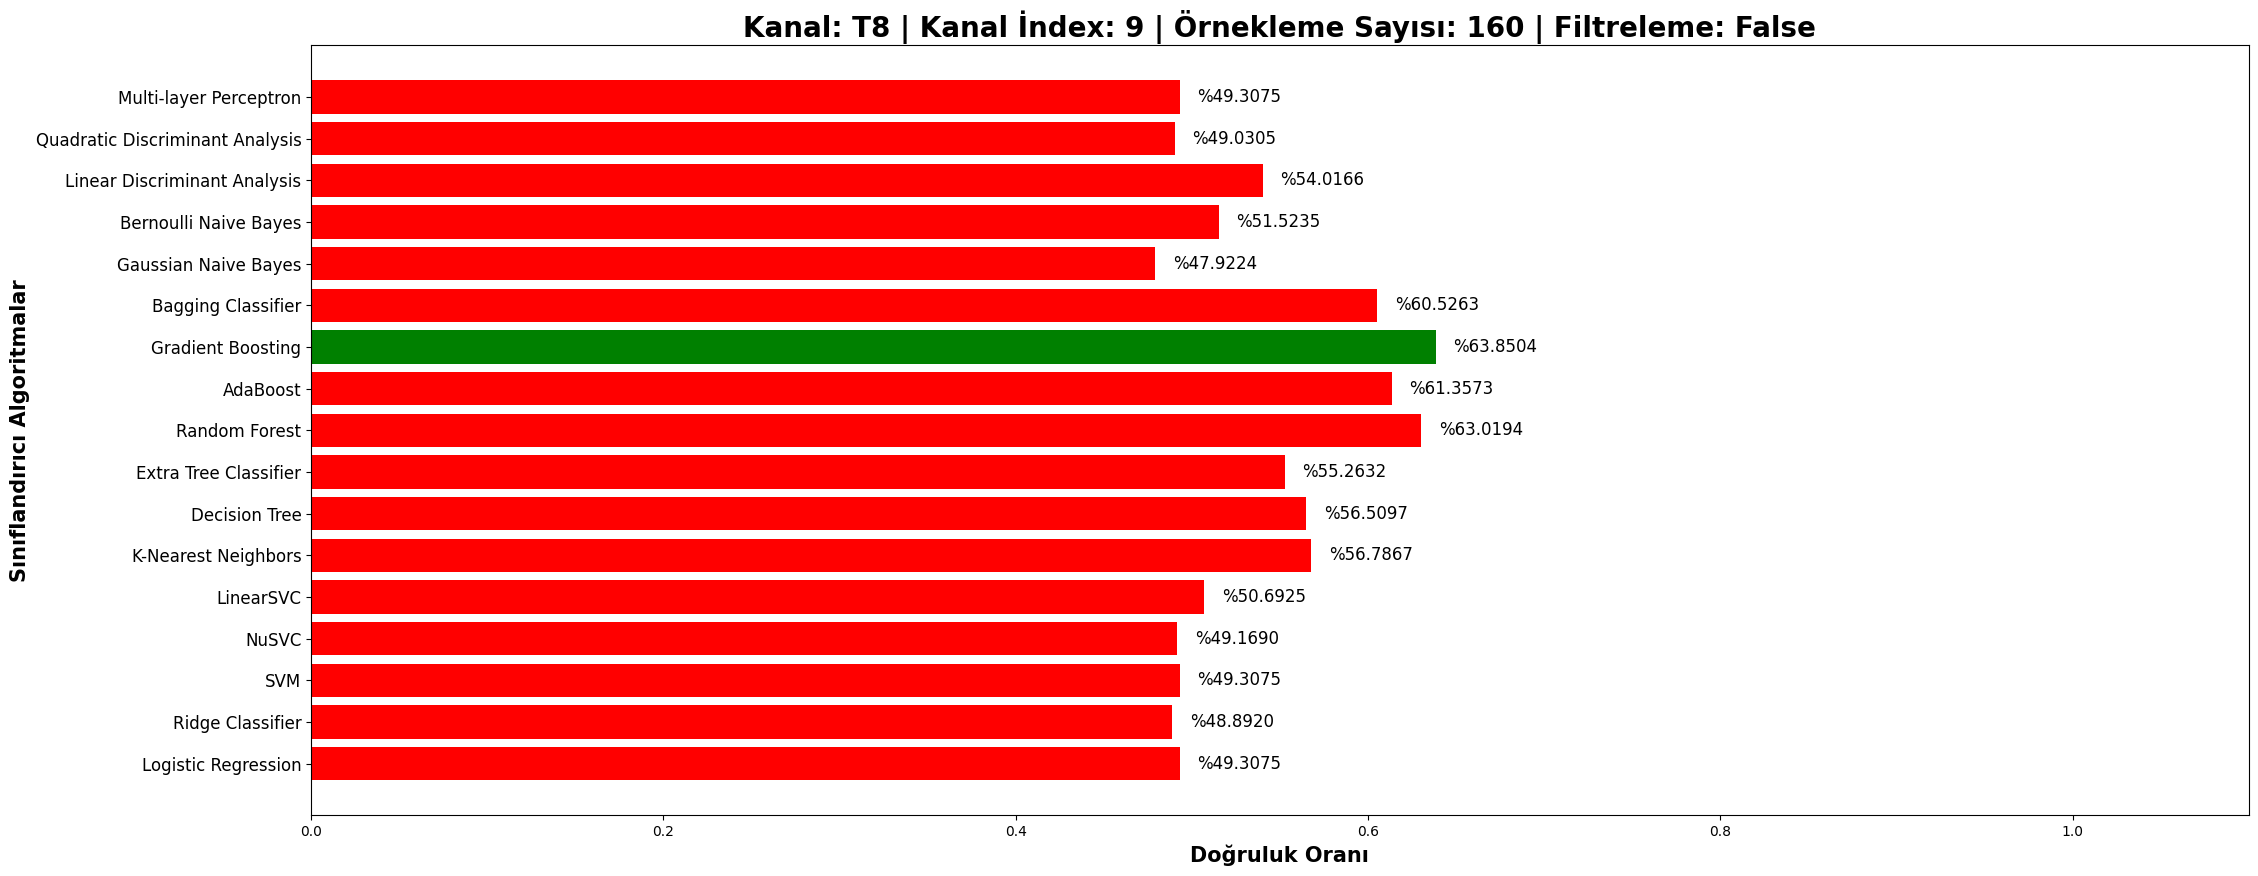


 Kanal indeksi: 10 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.49
Ridge Classifier accuracy: 0.49
SVM accuracy: 0.49
NuSVC accuracy: 0.51
LinearSVC accuracy: 0.49
K-Nearest Neighbors accuracy: 0.55
Radius Neighbors Classifier accuracy: 0.49
Decision Tree accuracy: 0.58
Extra Tree Classifier accuracy: 0.56


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Random Forest accuracy: 0.63
AdaBoost accuracy: 0.60
Gradient Boosting accuracy: 0.62
Bagging Classifier accuracy: 0.62
Gaussian Naive Bayes accuracy: 0.54
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.51
Linear Discriminant Analysis accuracy: 0.56
Quadratic Discriminant Analysis accuracy: 0.49


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.51
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.63


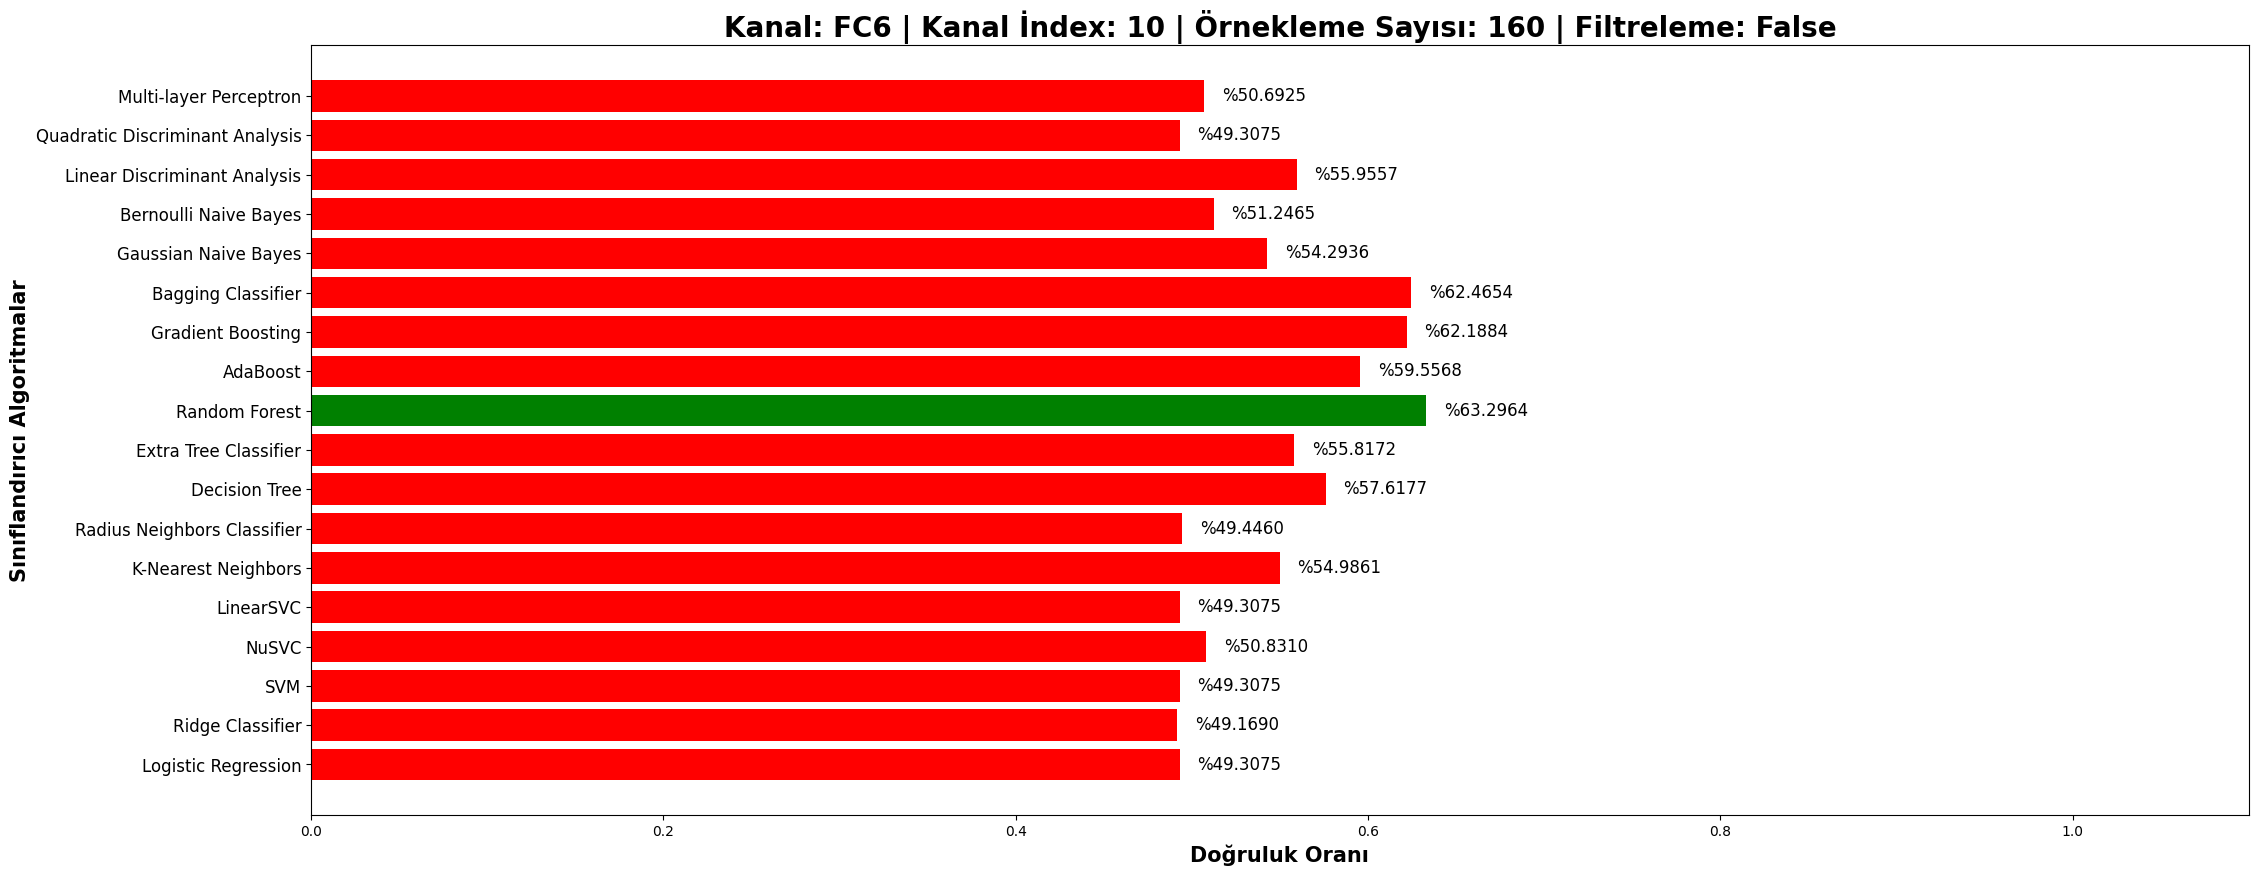


 Kanal indeksi: 11 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.49
Ridge Classifier accuracy: 0.49
SVM accuracy: 0.49
NuSVC accuracy: 0.49


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC accuracy: 0.49
K-Nearest Neighbors accuracy: 0.60
Radius Neighbors Classifier accuracy: 0.49
Decision Tree accuracy: 0.57
Extra Tree Classifier accuracy: 0.58
Random Forest accuracy: 0.61
AdaBoost accuracy: 0.63
Gradient Boosting accuracy: 0.64
Bagging Classifier accuracy: 0.60
Gaussian Naive Bayes accuracy: 0.58
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.50
Linear Discriminant Analysis accuracy: 0.57
Quadratic Discriminant Analysis accuracy: 0.50


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.51
En iyi performans gösteren algoritma: Gradient Boosting with an accuracy of 0.64


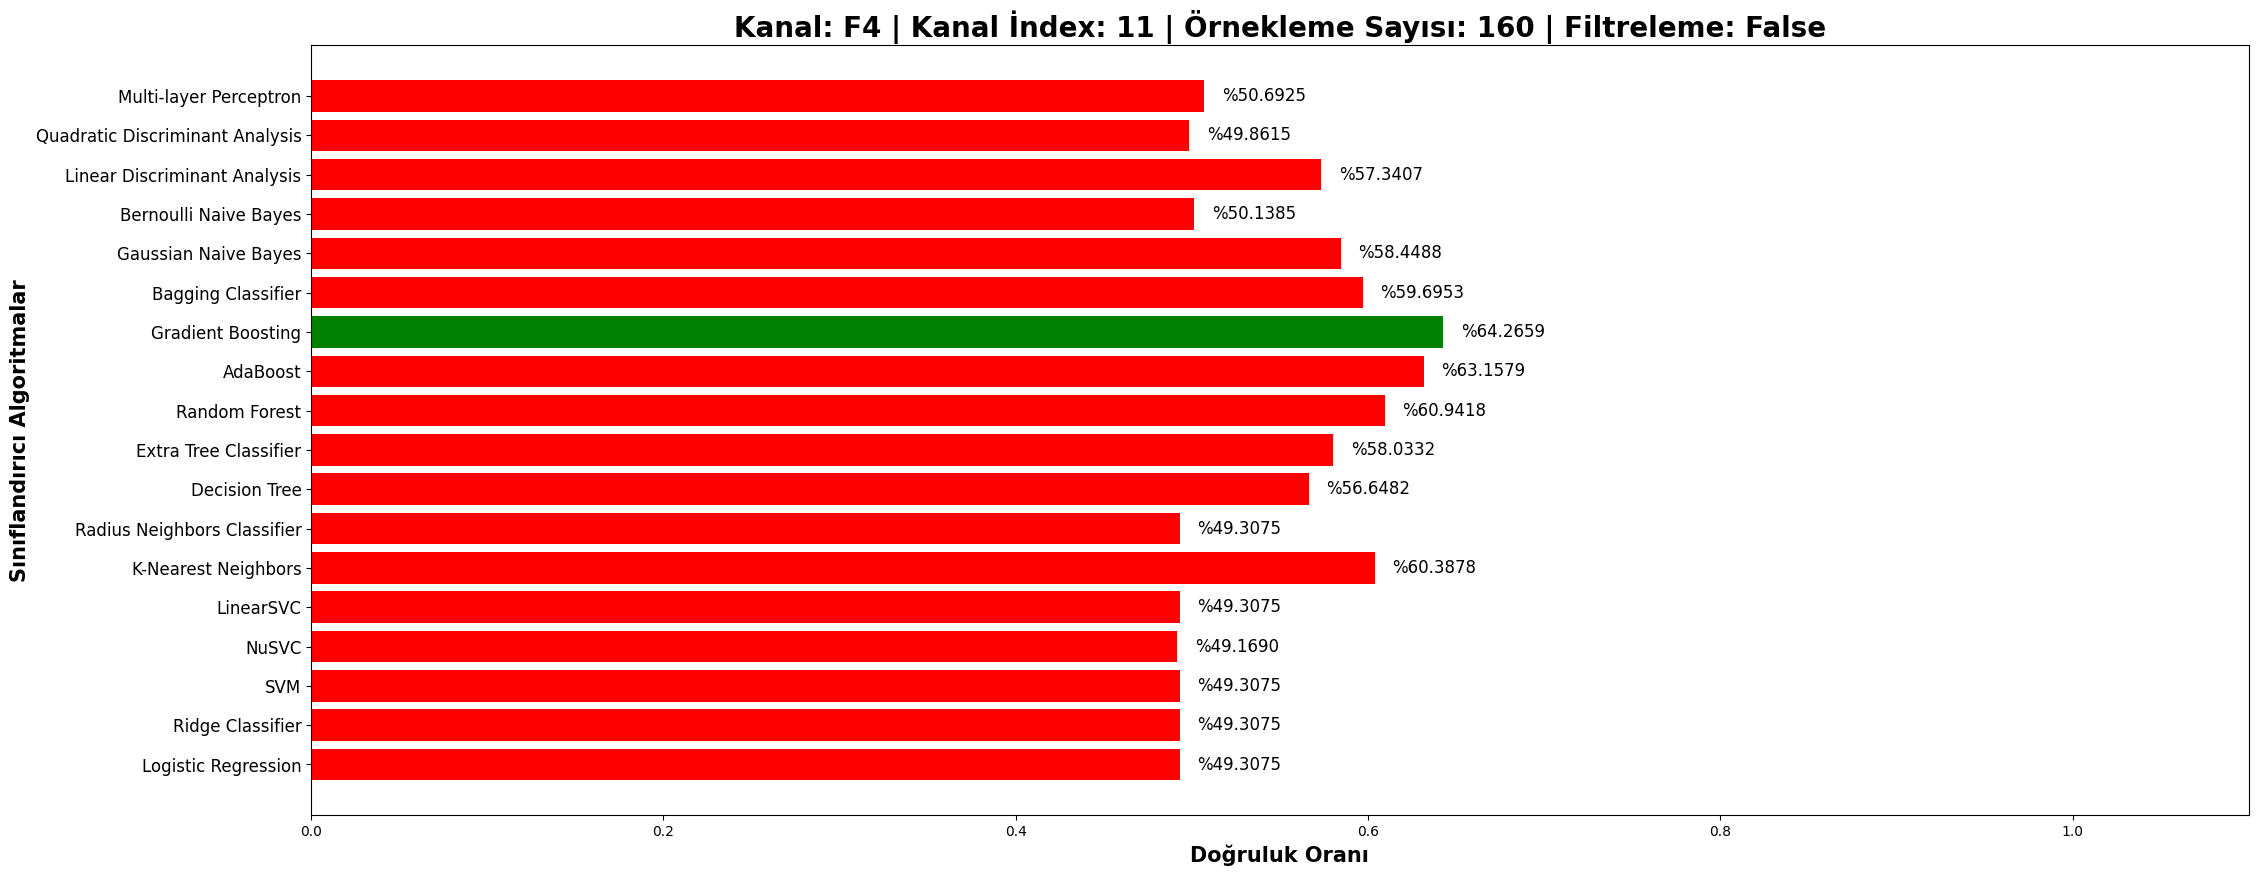


 Kanal indeksi: 12 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  [20]

 12 Kanal indeksi hatalı

 Kanal indeksi: 13 | Örnekleme Sayısı: 160 | Filtreleme: False
NaN içeren sütunlar:  []
NaN içeren sütunlar:  []
Logistic Regression accuracy: 0.49
Ridge Classifier accuracy: 0.49
SVM accuracy: 0.49
NuSVC accuracy: 0.49
LinearSVC accuracy: 0.51
K-Nearest Neighbors accuracy: 0.54
Radius Neighbors Classifier accuracy: 0.49


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Decision Tree accuracy: 0.50
Extra Tree Classifier accuracy: 0.49
Random Forest accuracy: 0.60
AdaBoost accuracy: 0.59
Gradient Boosting accuracy: 0.60
Bagging Classifier accuracy: 0.57
Gaussian Naive Bayes accuracy: 0.47
Multinomial Naive Bayes başarısız oldu.
Bernoulli Naive Bayes accuracy: 0.50
Linear Discriminant Analysis accuracy: 0.53
Quadratic Discriminant Analysis accuracy: 0.49


c:\Users\omerg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-layer Perceptron accuracy: 0.49
En iyi performans gösteren algoritma: Random Forest with an accuracy of 0.60


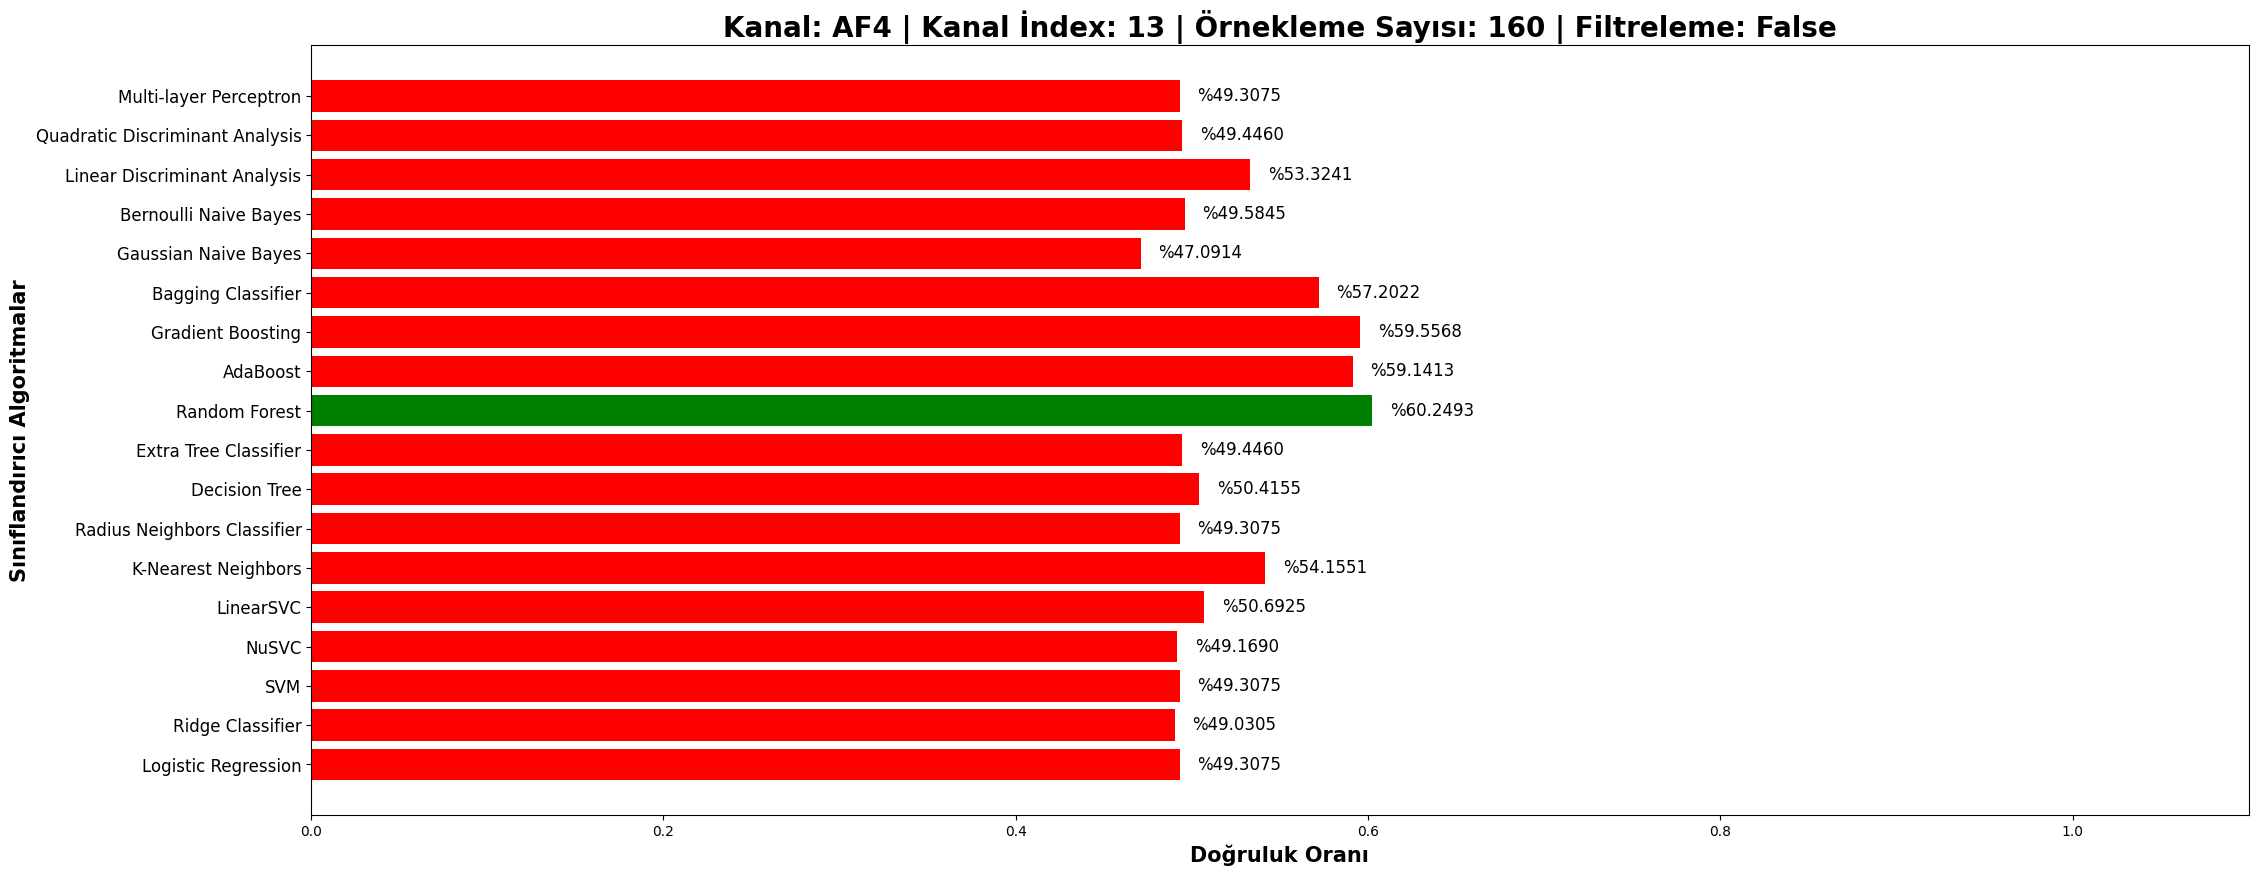


 Kanal indeksi: 14 | Örnekleme Sayısı: 160 | Filtreleme: False

 14 Kanal indeksi hatalı


In [8]:
import trainfunctions as tf
import matplotlib.pyplot as plt

def cizdir(kanal):
    plt.figure(figsize=(25, 10)) 
    plt.title(f"Kanal: {channel_names[kanal]} | Kanal İndex: {kanal} | Örnekleme Sayısı: {epoklanan_ornek_sayisi} | Filtreleme: {filtreleme}", fontsize=20, fontweight='bold')
    # En yüksek doğruluk oranına sahip olan sınıflandırıcıyı bul
    max_accuracy_index = accuracies.index(max(accuracies))
    # Her bir çubuğun rengini belirle
    colors = ['red' if i != max_accuracy_index else 'green' for i in range(len(classifier_names))]
    plt.barh(classifier_names, accuracies, color=colors)  # Çubukları yatay çiz
    plt.ylabel('Sınıflandırıcı Algoritmalar', fontsize=15, fontweight='bold')
    plt.xlabel('Doğruluk Oranı', fontsize=15, fontweight='bold')
    plt.xlim(0, 1.1)  # X ekseninin sınırlarını belirle
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')
    # Her bir çubuğun yanına değerini yaz
    for i in range(len(accuracies)):
        plt.text(accuracies[i] + 0.01, i, "%" + "{:.4f}".format(accuracies[i]*100), va='center', fontsize=12)
    plt.savefig(f"training_results/kanal_{kanal}_{channel_names[kanal]}_{epoklanan_ornek_sayisi}.png")
    plt.show()

def egitimeHazirla(veri, epoklanan_ornek_sayisi, kanal, etiket, filter_ = False):
    if type(kanal) == int:
        kanal = [kanal]
    kanalSayisi = len(kanal)
    veri = pd.DataFrame(veri)
    donenVeri = pd.DataFrame()
    
    for i in range(kanalSayisi):
        geciciVeri = veri.iloc[:, kanal[i]]  # Kanal indekslerini düzelt
        if filter_:
            geciciVeri = tf.filtrele(geciciVeri)
        geciciVeri = pd.DataFrame(geciciVeri)
        geciciVeri = tf.ornekle(geciciVeri, epoklanan_ornek_sayisi)
        geciciVeri = tf.ozellikCikar(geciciVeri)
        
        # donenVeri'nin sağ tarafına geciciVeri'yi ekler
        donenVeri = pd.concat([donenVeri, geciciVeri], axis=1)
    
    donenVeri = tf.cevapHazirla(donenVeri, etiket)
    # print(donenVeri.shape[1]) # Özellik sayısını yazdır
    # donenVeri = donenVeri.replace([np.inf, -np.inf], np.nan)
    # #hangi sütunlarda nan var
    # nan_columns = donenVeri.columns[donenVeri.isna().any()].tolist()
    # print("NaN içeren sütunlar: ", nan_columns)
    donenVeri = tf.temizle(donenVeri)
    # print(donenVeri.shape[1]) # Özellik sayısını yazdır
    return donenVeri

epoklanan_ornek_sayisi = 160
filtreleme = False

for i in range(0,15):
    try:
        print(f"\n Kanal indeksi: {i} | Örnekleme Sayısı: {epoklanan_ornek_sayisi} | Filtreleme: {filtreleme}")
        X_sag = egitimeHazirla(sag_veri, epoklanan_ornek_sayisi, i, 1, filtreleme)
        X_sol = egitimeHazirla(sol_veri, epoklanan_ornek_sayisi, i, 0, filtreleme)
        X = pd.concat([X_sag, X_sol], axis=0)
        #X'in son sütunu cevap sütunu olduğu için onu ayırma
        Y = X.iloc[:,-1]
        X = X.iloc[:,0:-1]
        test_algoritmasi(X, Y)
        cizdir(i)
    except:
        print(f"\n {i} Kanal indeksi hatalı")
        continue


    # Doğruluk oranlarını bar grafiği ile görselleştir

#-------------------KANAL SEÇİMİ-------------------
# X_sag = egitimeHazirla(sag_veri, epoklanan_ornek_sayisi, 5, 1, filtreleme)
# X_sol = egitimeHazirla(sol_veri, epoklanan_ornek_sayisi, 5, 0, filtreleme)

# X = pd.concat([X_sag, X_sol], axis=0)
# #X'in son sütunu cevap sütunu olduğu için onu ayırma
# Y = X.iloc[:,-1]
# X = X.iloc[:,0:-1]

# test_algoritmasi(X, Y)
# cizdir(5)


#-------------------------------------------------

# sag_x = tf.filtrele(sag_veri)
# sol_x = tf.filtrele(sol_veri)

# sag_x = pd.DataFrame(sag_x)
# sol_x = pd.DataFrame(sol_x)

# sag_x = tf.ornekle(sag_x, epoklanan_ornek_sayisi)
# sol_x = tf.ornekle(sol_x, epoklanan_ornek_sayisi)

# sag_x = tf.ozellikCikar(sag_x)
# sol_x = tf.ozellikCikar(sol_x)

# sag_x = tf.cevapHazirla(sag_x, 1)
# sol_x = tf.cevapHazirla(sol_x, 0)

# sag_x = tf.temizle(sag_x)
# sol_x = tf.temizle(sol_x)

#X verilerini alt alta birleştirme
# X = pd.concat([sag_x, sol_x], axis=0)
# X'in son sütunu cevap sütunu olduğu için onu ayırma
# Y = X.iloc[:,-1]
# X = X.iloc[:,0:-1]
